# Kaggle - WiDS Datathon 2022

## Modelo Interpretation

Based on https://towardsdatascience.com/deep-dive-into-catboost-functionalities-for-model-interpretation-7cdef669aeed

# 1. Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#model
from catboost import CatBoostRegressor

#train/test split
from sklearn.model_selection import train_test_split

#pool class
from catboost import Pool

#cross validation
from catboost import cv

# 2. Data

In [2]:
#paths to the Github repo

train_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/test.csv'
submit_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/sample_solution.csv'

In [3]:
#train dataset

train = pd.read_csv(train_path)
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
#test dataset

test = pd.read_csv(test_path)
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [5]:
#sumbit

submit = pd.read_csv(submit_path)
submit.head()

,id,site_eui
0,75757,0.0
1,75758,0.0
2,75759,0.0
3,75760,0.0
4,75761,0.0


In [6]:
x = train.drop(['id','site_eui'], axis=1)
x.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [7]:
y = train['site_eui']

In [8]:
cat_features = list(train.select_dtypes(include=['object']).columns)
cat_features

['State_Factor', 'building_class', 'facility_type']

In [25]:
data_pool = Pool(
    data=x, 
    label=y, 
    cat_features=cat_features
)

In [9]:
#train / validation split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=0)

#train pool
train_pool = Pool(
    data=x_train, 
    label=y_train, 
    cat_features=cat_features
)

#validation pool
validation_pool = Pool(
    data=x_validation, 
    label=y_validation, 
    cat_features=cat_features
)

In [13]:
model = CatBoostRegressor(iterations=20000)
model.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [15]:
x_test = test.drop('id', axis=1)
x_test.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [15]:
submit['site_eui'] = model.predict(x_test)
submit.to_csv('modelo_interpretation.csv',index=False)

In [24]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(14,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

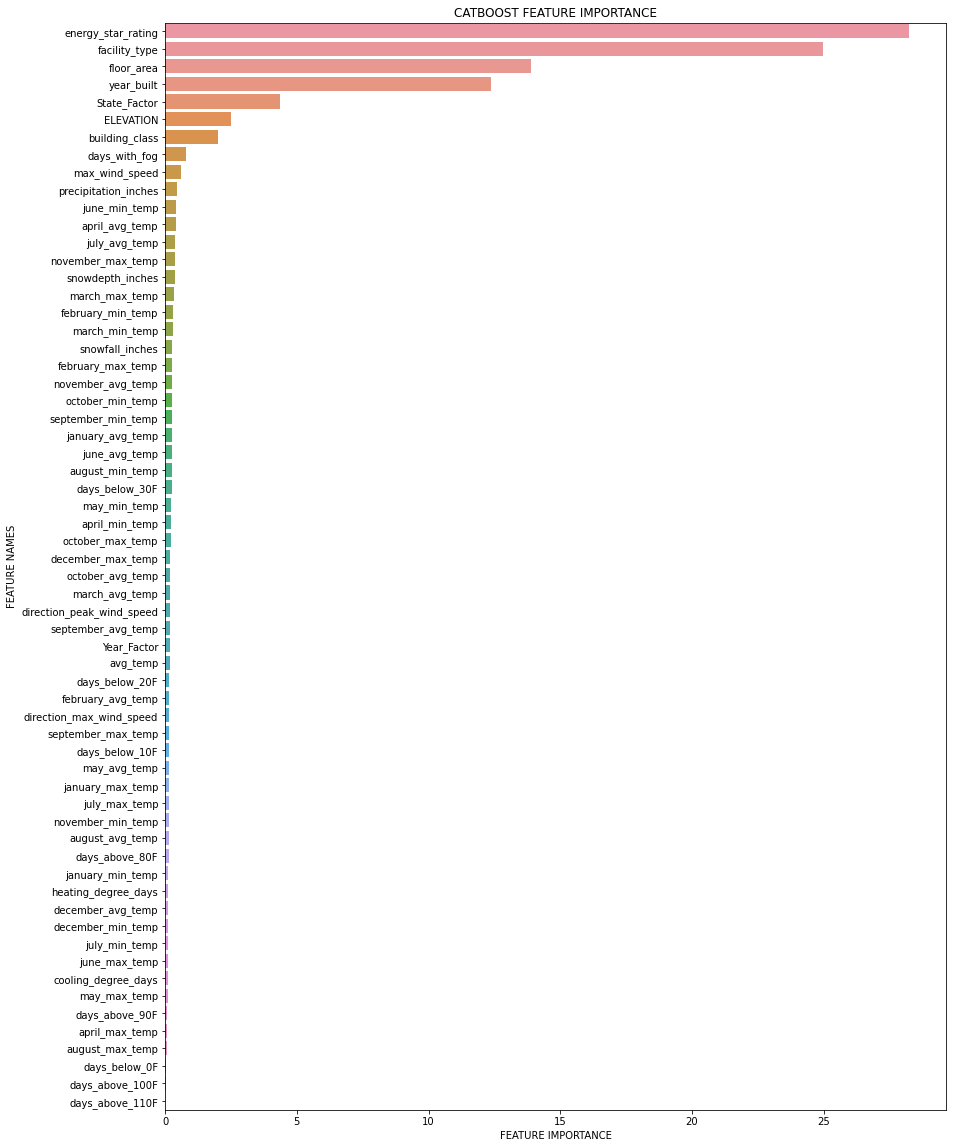

In [25]:
plot_feature_importance(model.get_feature_importance(),x.columns,'CATBOOST')

## Model 1

In [10]:
columnns1 = ['energy_star_rating','facility_type','floor_area','year_built','State_Factor','ELEVATION','building_class']

In [11]:
x_reduce1 = x[columnns1]

In [12]:
#train / validation split
x_train1, x_validation1, y_train1, y_validation1 = train_test_split(x_reduce1, y, test_size=0.2, random_state=0)

#train pool
train_pool1 = Pool(
    data=x_train1, 
    label=y_train1, 
    cat_features=cat_features
)

#validation pool
validation_pool1 = Pool(
    data=x_validation1, 
    label=y_validation1, 
    cat_features=cat_features
)

In [33]:
model1 = CatBoostRegressor(iterations=40000)
model1.fit(
    train_pool1,
    eval_set=validation_pool1,
    verbose=False,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [34]:
submit['site_eui'] = model1.predict(x_test[columnns1])
submit.to_csv('modelo_interpretation_1.csv',index=False)

## Modelo 2

In [13]:
model2 = CatBoostRegressor(iterations=60000)
model2.fit(
    train_pool1,
    eval_set=validation_pool1,
    verbose=False,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [16]:
submit['site_eui'] = model2.predict(x_test[columnns1])
submit.to_csv('modelo_interpretation_2.csv',index=False)

## Modelo 3

In [ ]:
{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'ctr_target_border_count': 1,
 'posterior_sampling': False,
 'has_time': False,
 'store_all_simple_ctr': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.0969950035214424,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'max_leaves': 64,
 'permutation_count': 4}

In [52]:
model_3 = CatBoostRegressor(cat_features=cat_features,verbose=False,random_seed=0)

In [ ]:
#grid params 
grid_3 = {'iterations':[10000],
          'depth':[6,8,10,12],
          'l2_leaf_reg':[2,3,4,5],
          'random_strength': [1,2,3],
          'min_data_in_leaf': [1,4,8,12],
          'max_leaves': [32,64,128]}


#cross validation proces
grid_search_result_3 = model_3.grid_search(grid_3, 
                                       X=x_reduce1, 
                                       y=y, 
                                       cv=5,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 41.15202365
bestIteration = 9999

0:	loss: 41.1520236	best: 41.1520236 (0)	total: 5m 1s	remaining: 2d 10m 58s

bestTest = 41.44127882
bestIteration = 9986

1:	loss: 41.4412788	best: 41.1520236 (0)	total: 10m 12s	remaining: 2d 49m 13s

bestTest = 41.3975055
bestIteration = 9998

2:	loss: 41.3975055	best: 41.1520236 (0)	total: 15m 29s	remaining: 2d 1h 20m 18s

bestTest = 41.47759749
bestIteration = 9999

3:	loss: 41.4775975	best: 41.1520236 (0)	total: 20m 45s	remaining: 2d 1h 27m 25s

bestTest = 41.68579657
bestIteration = 9994

4:	loss: 41.6857966	best: 41.1520236 (0)	total: 25m 33s	remaining: 2d 38m 45s

bestTest = 41.6133617
bestIteration = 9999

5:	loss: 41.6133617	best: 41.1520236 (0)	total: 30m 26s	remaining: 2d 11m 33s

bestTest = 41.90617053
bestIteration = 9997

6:	loss: 41.9061705	best: 41.1520236 (0)	total: 35m 30s	remaining: 2d 6m 22s

bestTest = 41.72555884
bestIteration = 9999

7:	loss: 41.7255588	best: 41.1520236 (0)	total: 40m 38s	remaining: 2d 5m 54s

bestTes

In [50]:
grid_search_result_3['params']

{'max_leaves': 64,
 'min_data_in_leaf': 1,
 'random_strength': 1,
 'depth': 6,
 'l2_leaf_reg': 2,
 'iterations': 1000}

In [51]:
submit['site_eui'] = model_3.predict(x_test[columnns1])
submit.to_csv('modelo_interpretation_3.csv',index=False)